# Homework 5
## Parker George
### February 21, 2025

# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy import stats

In [2]:
# Problem 1(a)
quad(lambda x: (1+x**2)/x, 1, 20)

(202.495732273554, 1.3443696573563126e-08)

In [3]:
# Problem 1(b)
quad(lambda x: (np.sin(x)*np.exp(-x))/x, 1, np.inf)

(0.1793245350394128, 7.620675259521867e-09)

In [4]:
# Problem 1(c)
quad(lambda x: np.sin(x)/x, 0 , 1)

(0.946083070367183, 1.0503632079297087e-14)

In [5]:
# Problem 1(d)
# Doesn't work great for the sin functions and the recursions exceed the maximum but for simple functions it works well.
def riemann(f, a, b, tol=1e-6):

    def integrate_recursive(a, b, tol):

        mid = (a + b) / 2

        # Midpoint rule
        I_mid = (b - a) * f(mid)

        # Trapezoidal rule
        I_trap = (b - a) * (f(a) + f(b)) / 2

        # Error estimation
        error = abs(I_trap - I_mid)

        if error < tol:
            return I_mid  # Accept the midpoint approximation
        else:
            # Subdivide interval and integrate recursively
            left = integrate_recursive(a, mid, tol / 2)
            right = integrate_recursive(mid, b, tol / 2)
            return left + right

    return integrate_recursive(a, b, tol)

print(riemann(lambda x: (1+x**2)/x, 1, 20, tol=1e-6))


202.4957320940254


# Problem 2

In [6]:
student_number=16132043  # your student number goes here
np.random.seed(student_number)
s=np.random.uniform(1,10)
np.random.seed(student_number)
a=np.random.randn()
print(s,a) # these numbers will be different for each of you

6.153541811268258 0.5859045966451093


In [7]:
noise = np.random.randn()*s

In [8]:
N=100
t=np.linspace(0,10,N)
signal=a*t

(100,)


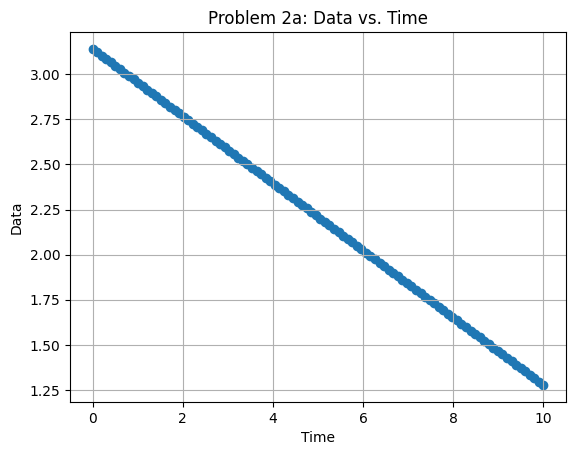

In [47]:
def problem2a(n, signal, noise):
    tot = np.zeros(n, dtype=float)
    for i in range(n):
        tot[i] = signal[i] + noise
    return tot

data = problem2a(N, np.random.randn()*t, np.random.randn()*s)
print(np.shape(data))
plt.scatter(t, data)
plt.title("Problem 2a: Data vs. Time")
plt.xlabel("Time")
plt.ylabel("Data")
plt.grid()
plt.show()

-0.18620581884666837 3.1401291217630156 -0.9999999999999999 0.0 2.8028530138491104e-10
[0.2824469]
0.28244661791896764


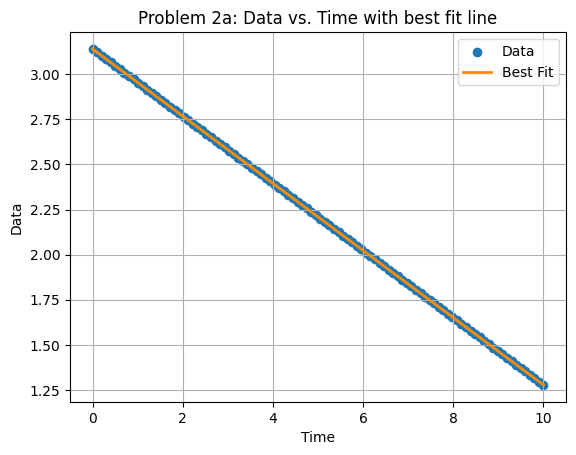

In [48]:
slope1, intercept, r_value, p_value, std_err = stats.linregress(t, data)
print(slope1, intercept, r_value, p_value, std_err)

slope = minimize(lambda x: np.sum((data - x*t)**2), 0.1,method="Nelder-mead", tol=1e-6)['x']
print(slope)

def best_fit(t,data):
    return np.sum(t*data)/np.sum(t**2)
best_fit = best_fit(t,data)
print(best_fit)

plt.scatter(t, data, label="Data")
plt.plot(t, slope1*t+intercept, label=f"Best Fit", color="darkorange", linewidth=2)
plt.title("Problem 2a: Data vs. Time with best fit line")
plt.xlabel("Time")
plt.ylabel("Data")
plt.grid()
plt.legend()
plt.show()

In [41]:
n=1000
tot_data = []

for i in range(0, n):
    tot_data.append(problem2a(N, np.random.randn()*t, np.random.randn()*s))

print(np.shape(tot_data))
slopes = np.zeros(len(tot_data), dtype=float)
for i in range(len(tot_data)):
    result = stats.linregress(t, tot_data[i])
    slopes[i] = result.slope
print(slopes)

(1000, 100)
[ 1.26341035e+00  1.55918833e+00  3.88934393e-01 -7.42097264e-01
  1.32991674e-01 -1.33375300e-02  3.42789898e-01  1.64450206e-01
  7.26617971e-01  6.80330191e-02  2.00064107e+00 -1.15409263e+00
  8.28637037e-01  3.78773066e-01 -4.38542827e-01 -2.03861591e+00
  1.35702006e+00  9.53841133e-01  2.17883634e-01  1.01650024e+00
  5.98877855e-01  1.64651636e-02 -8.37999793e-01  1.10159363e+00
  1.13925637e+00 -6.36855055e-01  6.36133327e-01 -3.10215259e-01
 -2.80824847e+00  1.87668736e+00 -4.66075345e-01 -4.02799136e-01
 -1.58468383e-01 -1.20517566e+00  8.19669999e-02  1.33371891e+00
 -1.14930094e+00 -4.23842986e-01  8.63767594e-01  1.38029770e+00
  2.17188014e-01 -1.49000007e+00 -1.51006061e+00 -1.69757121e+00
 -1.35315546e-01 -1.24858924e-01 -8.01206468e-01  9.87144060e-01
  1.10566326e+00 -1.75949006e+00  8.54607018e-01  2.53670336e+00
 -1.19540862e-01  3.01150747e-01 -8.60443064e-01 -9.99808637e-01
  8.91936703e-01 -7.97084846e-01 -3.26793264e-01 -3.44826938e-01
 -1.84728805e

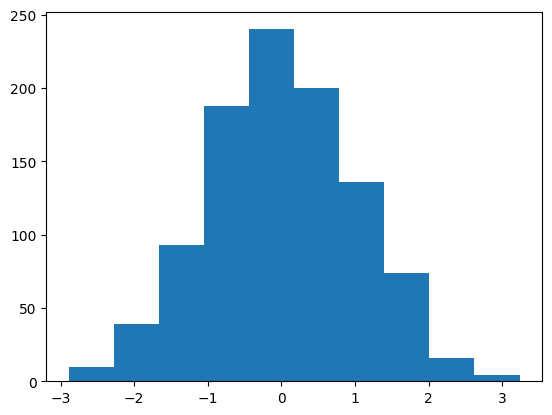

In [42]:
plt.hist(slopes)
plt.show()